In [2]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import chi2 
from mpmath import mp
from collections import Counter

# №2

In [6]:
mp.dps = 100_001 #устанавливаем число знаков после запятой + 1
pi_after = mp.pi # присваем перемнной значение числа пи с нашим числом знаков после запятой
pi_after_dot = str(pi_after)[2:] # берем только цифры после запятой
len(pi_after_dot) # проверка числа знаков

100000

In [18]:
pi_after_dot_counted = dict(sorted(Counter(pi_after_dot).items())) #подсчитали количество знаков после запятой
pi_after_dot_counted

{'0': 9999,
 '1': 10137,
 '2': 9908,
 '3': 10025,
 '4': 9971,
 '5': 10026,
 '6': 10029,
 '7': 10025,
 '8': 9978,
 '9': 9902}

In [23]:
# Вычисляем ожидаемую статистику знаков, что проверить гипотезу H0 о равномерном распределении знаков десятичной записи числа pi
expected_value = len(pi_after_dot) // 10
# Для опровержения/принятия H0 сравним количество вхождений каждой цифры с ожидаемым значением 
# Вычислим эмпирическую статистику знаков, сравнивая количество каждого знака с ожидаемым равномерным распределением, вычислив хи-квадрат-статистику
chi_squared = 0
for i in range(10):
    observed_value = pi_after_dot_counted[str(i)]
    chi_squared += ((observed_value - expected_value)**2) / expected_value
print(f"chi_squared: {chi_squared}")

chi_squared: 4.093


In [25]:
#по таблице хи-квадрат найдем p-value исходя из значения статистики
#при сичле степеней свободы 9 и chi_squared: 4.093, p-value будет чуть больше 0.9

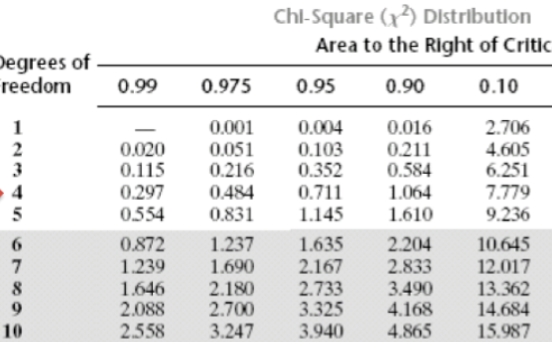

In [31]:
#эмперическое распределение знаков
for i in pi_after_dot_counted:
    print(i, pi_after_dot_counted[i] / len(pi_after_dot))

0 0.09999
1 0.10137
2 0.09908
3 0.10025
4 0.09971
5 0.10026
6 0.10029
7 0.10025
8 0.09978
9 0.09902


# №3

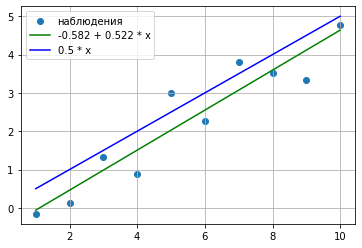

In [41]:
# задаем параметры
N = 10
norm_dist = stats.norm(loc=0,scale=1)
a,b = 0,0.5
# наши x
x = np.arange(1,N+1)
# строим точки для оценки последующей
y = a + b*x + norm_dist.rvs(N)
# реальная зависимость
y_real = a + b*x
# считаем оценки коэфициентов парной регрессии по формулам
b_est = (np.mean(x*y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x)**2)
a_est = np.mean(y) - b_est * np.mean(x)
# получаем оценки y
y_pred = a_est + b_est * x
# визуализируем
plt.scatter(x,y,label = 'наблюдения')
plt.plot(x,y_pred,'g',label=f'{round(a_est,3)} + {round(b_est,3)} * x')
plt.plot(x,y_real,'b',label='0.5 * x')
plt.legend()
plt.grid()